# k-Means Clustering

In this notebook, you will implement the k-means clustering algorithm.

## Packages

Following packages is all you need. Do not import any additional packages!

In case you are not familiar with [Numpy](http://www.numpy.org/) library, it provides support for large multi-dimensional arrays and matrices, along with functions to operate on these. [Matplotlib](https://matplotlib.org/) is a plotting library.

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## Function

A function for plotting that we are going to use later on.

In [2]:
def plot_clusters(data, centroids):
    """
    Shows a scatter plot with the data points clustered according to the centroids.
    """
    # Assigning the data points to clusters/centroids.
    clusters = [[] for _ in range(centroids.shape[0])]
    
    # The shape attribute for numpy arrays returns the dimensions of the array. 
    # If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
    for i in range(data.shape[0]):
        # .linarg stands for linear algebra and the .norm gives the matrix or vector norm. 
        # a norm is a function that assigns a strictly positive length or size to each vector in a vector space
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        # .argmin returns the indices of the minimum values along an axis.
        clusters[np.argmin(distances)].append(data[i])

    # Plotting clusters and centroids.
    fig, ax = plt.subplots()
    for c in range(centroids.shape[0]):
        if len(clusters[c]) > 0:
            cluster = np.array(clusters[c])
            ax.scatter(cluster[:, 0], cluster[:, 1], s=7)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

## Data

Let us generate a dataset you are going to play with. We will stay in the Euclidean space because it is easy to plot.

In [3]:
# We would like to have some control over the randomly generated data.
# This is just for development purposes.
np.random.seed(0)

# Euclidean space.
DIMENSIONS = 2

# We will generate clusters.
CLUSTERS = [
    {
        'mean': (10, 10),
        'std': (10, 5),
        'size': 300
    },
    {
        'mean': (10, 85),
        'std': (10, 3),
        'size': 100
    },
    {
        'mean': (50, 50),
        'std': (6, 6),
        'size': 200
    },
    {
        'mean': (80, 75),
        'std': (5, 10),
        'size': 200
    },
    {
        'mean': (80, 20),
        'std': (5, 5),
        'size': 100
    }
]

# Initializing the dataset with zeros.
synthetic_data = np.zeros((np.sum([c['size'] for c in CLUSTERS]), DIMENSIONS))

# Generating the clusters.
start = 0
for c in CLUSTERS:
    for d in range(DIMENSIONS):
        # random.normal Draws random samples from a normal (Gaussian) distribution.
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html
        synthetic_data[start:start + c['size'], d] = np.random.normal(c['mean'][d], c['std'][d], (c['size']))
    start += c['size']
print(synthetic_data)

[[27.64052346  3.46736574]
 [14.00157208 18.2906534 ]
 [19.78737984  9.40917977]
 ...
 [80.85621773 20.91725127]
 [80.19454353 17.64628751]
 [83.13282125 21.36398195]]


In [4]:
print('shape (size, dimensions) =', synthetic_data.shape)

shape (size, dimensions) = (900, 2)


And this is how our data look like when plotted.

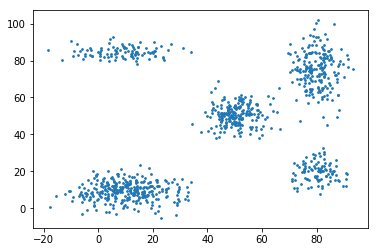

In [5]:
plt.figure()
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], s=3)

## Implementation

A human can with an ease find five distinct clusters just by watching the plot. A computer, however, needs to be told how to find the clusters.

**Exercise:**

Implement the k-means clustering algorithm.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

**Self Notes:**    
The algortihm explained step by step:

* Select K initial centroids(center of the shape) where K is the number of clusters desired and is specified by the user

* Each of the points is then assigned to the closet centroid (as mentioned we use Euclidean distance), and each collection of points assigned to a centroid is a cluster.

* The centroid of each cluster is then updated based on the points assigned to the cluster

* We repeat the assignment and update steps until no points changes clusters, or equivalently, until centroids remain the same. 

In [6]:
def compute_new_centroids(clusters, centroids):
    new_centroids = []
    for c in range(centroids.shape[0]):
            new_centroids.append(np.mean(clusters[c], axis=0, dtype=np.float64))
    return np.array(new_centroids)

def get_clusters(data, centroids):
        # This is where we save the data points that are assigned to a specific centroid
        clusters = [[] for _ in range(centroids.shape[0])]
        
        # Iterate over the datapoints and form the clusters
        for i in range(data.shape[0]):

            # .linarg stands for linear algebra and the .norm gives the matrix or vector norm. 
            # This will be the same as the Eucledian distances between the data point data[i] and the different centroids
            distances = np.linalg.norm(data[i] - centroids, axis=1)

            # With argmin we find the indice of the centroid with the smallest distance to the data point
            # We append the datapoint to the corresponding cluster
            clusters[np.argmin(distances)].append(data[i].tolist())
        return clusters

def kmeans(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        initial centroids
    :return
        final centroids
    """
    ### START CODE HERE ### 
    # We give the change in the centroid values a 1% tolerance
    TOLERANCE = 0.005 
    
    # We need to keep making the clusters until the centroids stop changing
    # Use the isOptimal attribute to break if the change is less than a certain tolerance
    isOptimal = False
    while not isOptimal:
        
        # This is where we save the data points that are assigned to a specific centroid
        clusters = get_clusters(data, centroids)
            
        # Now that we have the clusters we need to recompute the centroids
        # It can be shown that the centroid that minimizes the SSE of the cluster is the mean
        # So for each cluster we find the mean values, and assignes these new values as centroids
        # To illustrate, the centroid of a cluster containing the three two-dimensional points,
        # (1,1), (2,3), and (6,2), is ((1 + 2 + 6)13,((1 +3 + 2)13) : (3,2).
        isOptimal = True
        new_centroids = compute_new_centroids(clusters, centroids)
        for c in range(centroids.shape[0]):
            #print(np.absolute(np.sum((centroids[c] - new_centroids[c])/centroids[c])), new_centroids[c], centroids[c])
            if np.absolute(np.sum((centroids[c] - new_centroids[c])/centroids[c])) > TOLERANCE:
                isOptimal = False
                
        #Assign the new values and reapat if not optimal
        centroids = new_centroids

    ### END CODE HERE ###
    return centroids

We have prepared for you a small piece of code, so that you can test that the function works according the expectations.

c0 = [10.60838779 23.74997384]
c1 = [49.02859109 49.15205809]
c2 = [76.15408829 21.7746025 ]


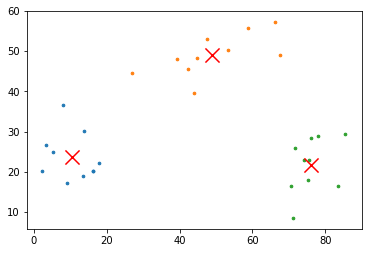

In [7]:
test_data = np.array([
    [66.24345364, 57.31053969],
    [43.88243586, 39.69929645],
    [44.71828248, 48.38791398],
    [39.27031378, 48.07972823],
    [58.65407629, 55.66884721],
    [26.98461303, 44.50054366],
    [67.44811764, 49.13785896],
    [42.38793099, 45.61070791],
    [53.19039096, 50.21106873],
    [47.50629625, 52.91407607],
    [2.29566576, 20.15837474],
    [18.01306597, 22.22272531],
    [16.31113504, 20.1897911 ],
    [13.51746037, 19.08356051],
    [16.30599164, 20.30127708],
    [5.21390499, 24.91134781],
    [9.13976842, 17.17882756],
    [3.44961396, 26.64090988],
    [8.12478344, 36.61861524],
    [13.71248827, 30.19430912],
    [74.04082224, 23.0017032 ],
    [70.56185518, 16.47750154],
    [71.26420853, 8.57481802],
    [83.46227301, 16.50657278],
    [75.25403877, 17.91105767],
    [71.81502177, 25.86623191],
    [75.95457742, 28.38983414],
    [85.50127568, 29.31102081],
    [75.60079476, 22.85587325],
    [78.08601555, 28.85141164]
])
test_centroids = np.array([
    [25, 50],
    [50, 50],
    [75, 50]
])

test_centroids = kmeans(test_data, test_centroids)

print('c0 =', test_centroids[0])
print('c1 =', test_centroids[1])
print('c2 =', test_centroids[2])
plot_clusters(test_data, test_centroids)

We expect the output to be similar to following.

```
c0 = [ 9 25]
c1 = [50 50]
c2 = [75 20]
```

If it is not the case, review your implementation, debug your algorithm, try it on paper, ...

## Clustering

Ready to run your implementation of k-means clustering on the dataset? Let's do it...

First, we need to initialize the centroids. We will go for a random initialization eventhough there are some disadvantages of doing so (see the Introduction to Data Mining from Tan et al.).

c0 = [32.  3.]
c1 = [75. 85.]
c2 = [65. 77.]
c3 = [16. 63.]
c4 = [-15.   2.]


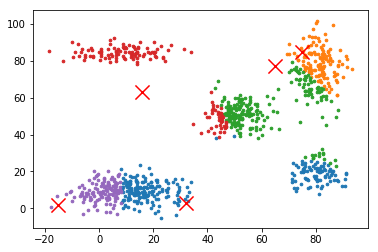

In [8]:
# Number of clusters.
K = 5

# Boundaries of our data.
x_min = np.min(synthetic_data[:, 0])
x_max = np.max(synthetic_data[:, 0])
y_min = np.min(synthetic_data[:, 1])
y_max = np.max(synthetic_data[:, 1])

# Generating random centroids within the data boundaries.
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Finally, we run the `kmeans()` function you have implemented.

c0 = [80.35860123 19.92039624]
c1 = [80.01412361 75.34768277]
c2 = [50.52455759 50.55856347]
c3 = [ 8.6505037  84.62920215]
c4 = [10.27529575  9.31284683]


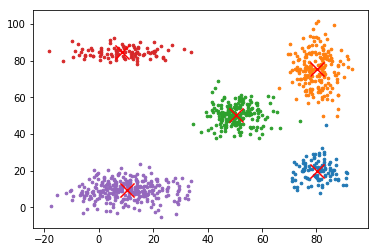

In [9]:
centroids = kmeans(synthetic_data, centroids)

# plt.scatter(data[:, 0], data[:, 1], s=3)
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

for i in range(len(centroids)):
    print('c%d =' % i, centroids[i])
plot_clusters(synthetic_data, centroids)

Congratulations! At this point, hopefully, you have found all five distinct clusters with the centroids aligned in their centers.

## Evaluation of Clustering

Silhouette Coefficient is an example of a measure for validation of the cluster quality.

**Exercise:**

Implement a function calculating the mean Silhouette Coefficient of all samples.

* Use the Euclidean (L<sub>2</sub>) distance.
* It is sufficient to use the basic Python constructs in your implementation, even though we heavily rely on Numpy throughout this assignment.

**Self Notes:**    
Finding the Siluette Coefficent an object step by step:   
* For the ith object, calculate its average distance to all other objects in its cluster. Call this value a_i
* For the ith object and any cluster not containing the object, calculate the objects average distance to all the objects in the given cluster. Find the minimum such value with respect to all clusters, call this value b_i
* For the ith object, the silhouette coefficient is s_i = (b_i - a_i) / max(a_i,b_i)

In [10]:
def silhouette_score(data, centroids):
    """
    Function implementing the k-means clustering.
    
    :param data
        data
    :param centroids
        centroids
    :return
        mean Silhouette Coefficient of all samples
    """
    ### START CODE HERE ### 
    clusters = get_clusters(data, centroids)
    
    # First lets find the average distance to all other object in its own cluster
    a = []
    for cluster in clusters:
        for point in cluster:
            distances = np.linalg.norm(np.array(point) - np.array(cluster), axis=1)
            avg_dist = np.sum(distances)/(len(cluster) - 1)
            a.append(avg_dist)
    
    # Then lets find the average distance for each object to all the different clusters and choos the minimum
    b = []
    for cluster in clusters:
        for point in cluster:
            # Save all the other clusters in a different variable
            cluster_index = clusters.index(cluster)
            other_clusters = list(clusters)
            del other_clusters[cluster_index]
            
            # For each of the other clusters, find the avg distance and select the minimum of those
            avg_distances = []
            for oc in other_clusters:
                distances = np.linalg.norm(np.array(point) - np.array(oc), axis=1)
                avg_dist = np.sum(distances)/(len(oc))
                avg_distances.append(avg_dist)
            b.append(min(avg_distances))
    
    
    scores = []
    # Now lets compute the Silhouette Coefficient for each of the objects and return the average as the score
    for x in range(len(a) - 1):
        res = (b[x] - a[x])/max([a[x],b[x]])
        scores.append(res)
    
    ### END CODE HERE ### 
    return sum(scores)/len(scores)

First, let's see if the algorithm executes on the test data.

In [11]:
silhouette_score(test_data, test_centroids)

0.6734421957046408

We expect the output to be around `0.675`.

Finally, let's cluster again our synthetic data and calculate the Silhouette Coefficient.

silhouette_coefficient = 0.511270546841137


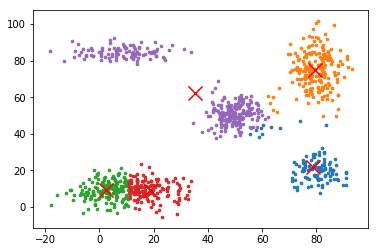

In [12]:
centroids = np.zeros((K, synthetic_data.shape[1]))
centroids[:, 0] = np.random.randint(x_min, x_max, size=K)
centroids[:, 1] = np.random.randint(y_min, y_max, size=K)

centroids = kmeans(synthetic_data, centroids)
silhouette_coefficient = silhouette_score(synthetic_data, centroids)

print('silhouette_coefficient =', silhouette_coefficient)
plot_clusters(synthetic_data, centroids)

**Exercise:**

* Run the clustering multiple times and pay attention to the results.
* In the *Discussion* below, describe your observations and discuss reasons for the possibly strong or weak performance of the algorithm. If you identify any weaknesses, suggest a possible solution.

## Discussion

<span style="color: red;">*Place for your discussion.*</span> ✌️